In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Downloads\Hotel_Booking\hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Data Cleaning

In [6]:
# Here we check clumns 'adults', 'children', 'babies'. If these have null or 0 then we remove column.
df[['adults', 'children', 'babies']].isnull().sum()

adults      0
children    4
babies      0
dtype: int64

In [7]:
filter1 = (df["children"]==0)&(df["adults"]==0)&(df["babies"]==0)

In [8]:
df = df[~filter1]

In [9]:
df.duplicated().sum()

31980

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87230.0,0.275238,0.446637,0.00,0.00,0.0,1.0,1.0
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
arrival_date_year,87230.0,2016.210352,0.686064,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,87230.0,26.835091,13.669216,1.00,16.00,27.0,37.0,53.0
arrival_date_day_of_month,87230.0,15.815832,8.835545,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,87230.0,1.004609,1.027408,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,87230.0,2.623925,2.039830,0.00,1.00,2.0,4.0,50.0
adults,87230.0,1.879365,0.621724,0.00,2.00,2.0,2.0,55.0
children,87226.0,0.138904,0.456274,0.00,0.00,0.0,0.0,10.0
babies,87230.0,0.010845,0.113704,0.00,0.00,0.0,0.0,10.0


In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [13]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
df["hotel"] = df["hotel"].rename({"Resort Hotel":0,"City Hotel":1})

In [15]:
df["is_canceled"].unique()

array([0, 1], dtype=int64)

In [16]:
df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]]

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1
...,...,...,...
119385,2017,August,30
119386,2017,August,31
119387,2017,August,31
119388,2017,August,31


In [17]:
df.drop("arrival_date_week_number",axis=1,inplace=True)

In [18]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert month names to month numbers
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

In [19]:
not_canceled = df[df["is_canceled"]==0]

In [20]:
not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,30,2,5,2,0.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,8,31,2,5,3,0.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,8,31,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,8,31,2,5,2,0.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [21]:
not_canceled["country"].value_counts()

country
PRT    17573
GBR     8440
FRA     7091
ESP     5382
DEU     4332
       ...  
ZMB        1
SYC        1
MDG        1
SMR        1
FRO        1
Name: count, Length: 165, dtype: int64

<BarContainer object of 5 artists>

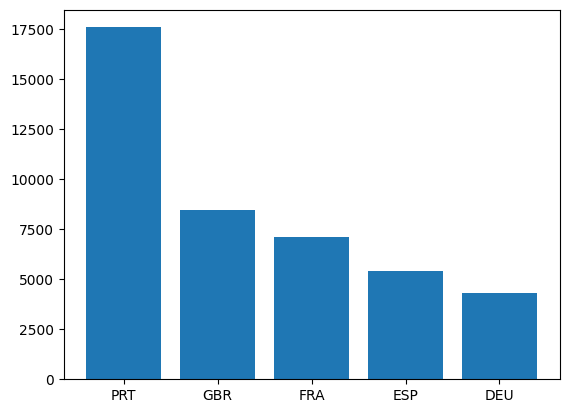

In [22]:
#Top 5 country 
top_5 = not_canceled["country"].value_counts()
plt.bar(height=top_5[:5],x=top_5.index[:5])

In [23]:
country_wise = not_canceled["country"].value_counts().reset_index()

In [24]:
country_wise

,country,count
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [25]:
country_wise.columns = ["country","number of guests"]

In [26]:
import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

## iplot() when working in a Jupyter Notebook to
## display the plot in the Ipython notebook.

init_notebook_mode(connected=True)

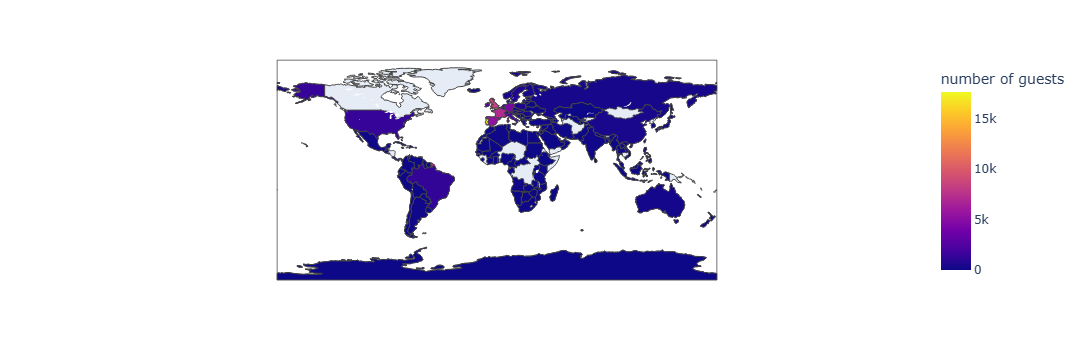

<Figure size 800x800 with 0 Axes>

In [27]:
plt.figure(figsize=(8,8))
px.choropleth(data_frame=country_wise,locations=country_wise["country"],color=country_wise["number of guests"])

In [28]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [29]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004586
babies                             0.000000
meal                               0.000000
country                            0.512438
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [30]:
df.drop("company",axis=1,inplace=True)

In [31]:
pivot = pd.crosstab(index=df["reserved_room_type"],columns=df["assigned_room_type"],margins=True,normalize='index').round(2)*100

In [32]:
pivot

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [33]:
mar = df["market_segment"].value_counts()

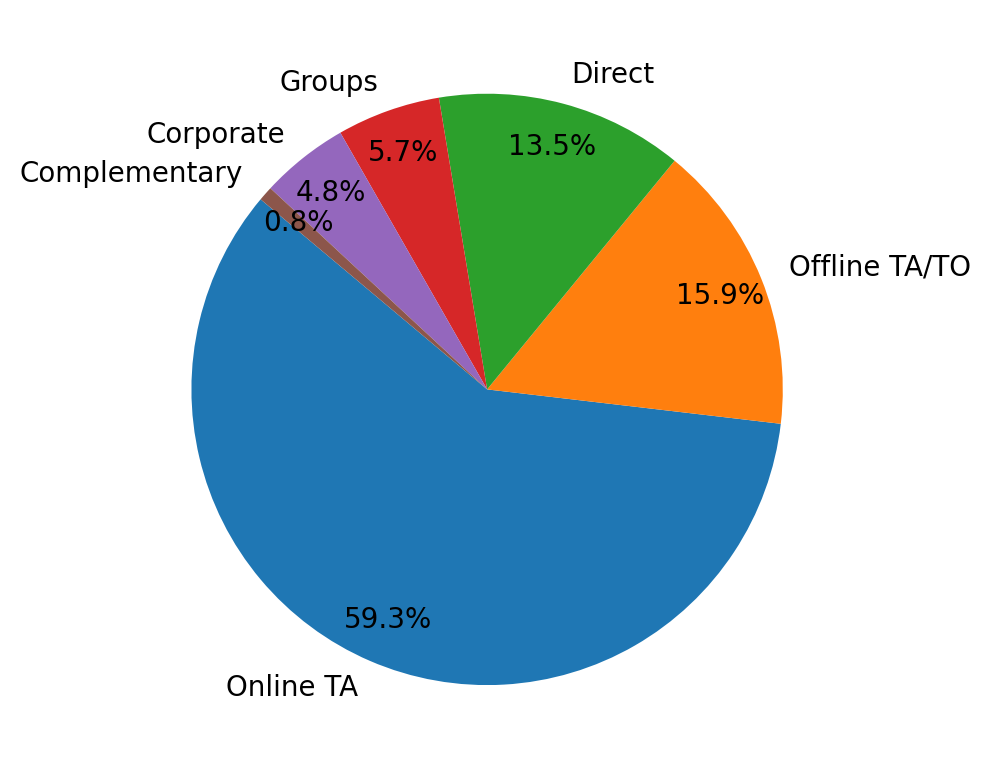

In [34]:
plt.figure(dpi=200)
plt.pie(mar[:6],autopct='%1.1f%%',startangle=140,pctdistance=0.85,labels=mar.index[:6]);

## Which market has highest booking


In [35]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [36]:
df["market_segment"].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

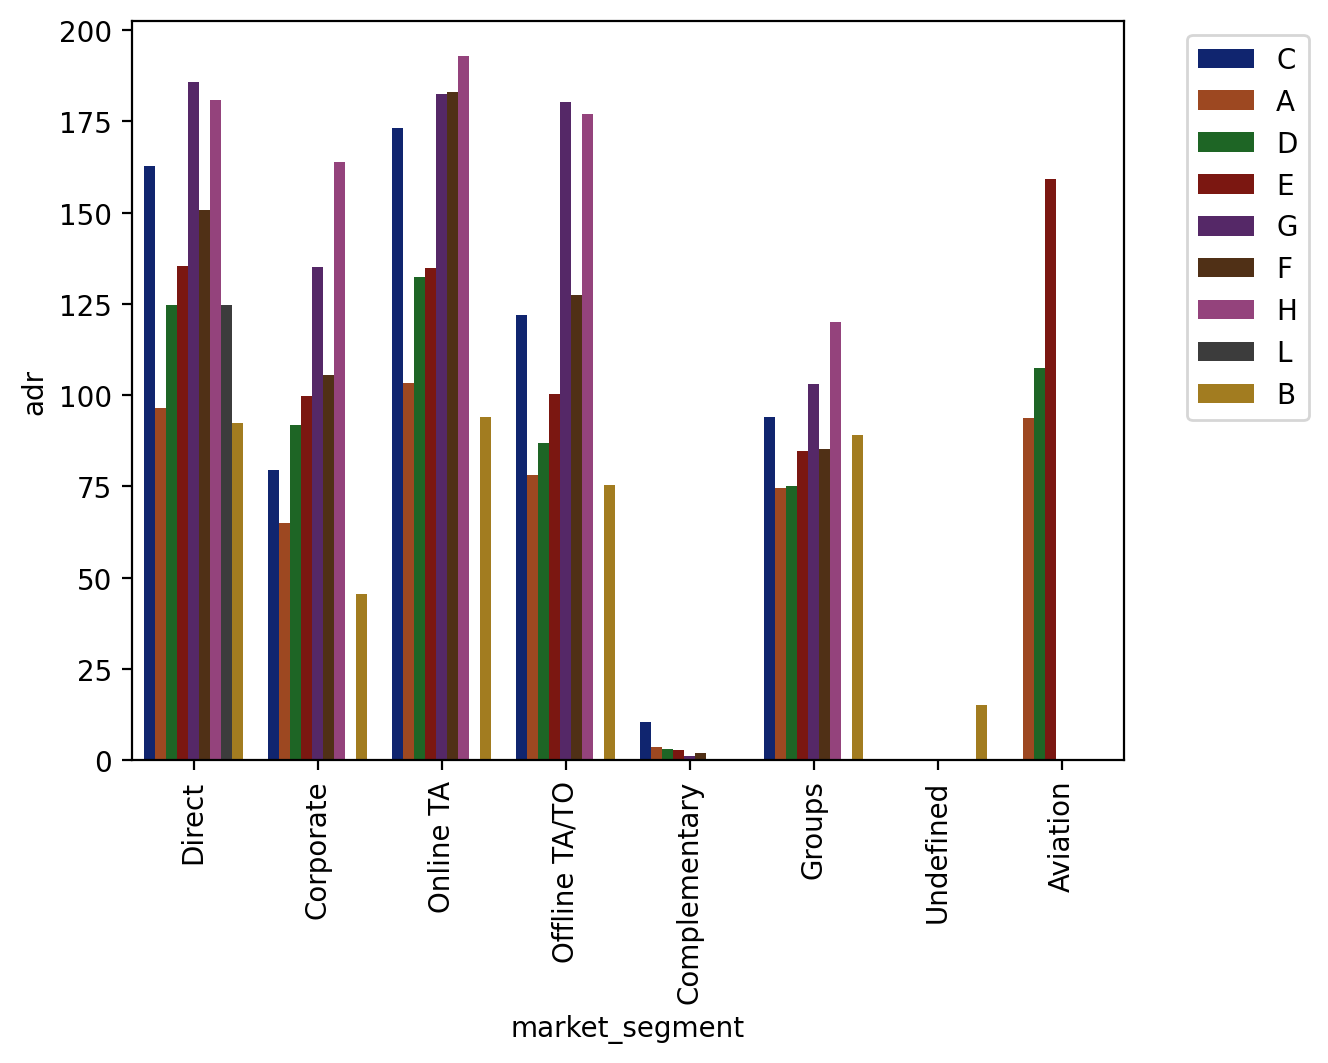

In [37]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=df,x="market_segment",y="adr",palette="dark",hue="reserved_room_type",ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [38]:
df.rename({"arrival_date_year":"year","arrival_date_month":"month","arrival_date_day_of_month":"day"},axis=1,inplace=True)

In [39]:
df.head()

,hotel,is_canceled,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [40]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [41]:
pd.to_datetime('2023-12-20')-df["reservation_status_date"][1]

Timedelta('3094 days 00:00:00')

In [42]:
df["Date"] = df[['year', 'month', 'day']].astype(str).agg('/'.join, axis=1)

In [43]:
df["Date"] = pd.to_datetime(df["Date"])

In [44]:
df["Date"].dtype

dtype('<M8[ns]')

In [45]:
df.head()

,hotel,is_canceled,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [46]:
df.rename({"Date":"booked_date"},inplace=True)

In [47]:
df.head()

,hotel,is_canceled,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [48]:
days_before_booked = df["reservation_status_date"]-df["Date"]

In [49]:
days_before_booked

0        0 days
1        0 days
2        1 days
3        1 days
4        2 days
          ...  
119385   7 days
119386   7 days
119387   7 days
119388   7 days
119389   9 days
Length: 87230, dtype: timedelta64[ns]

In [50]:
d =np.abs( days_before_booked.astype(str).apply(lambda x : (x[:-4])).astype('int'))

<Axes: >

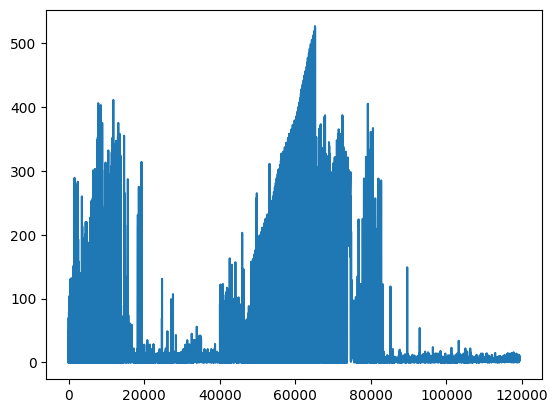

In [51]:
sns.lineplot(d)

<Axes: ylabel='Density'>

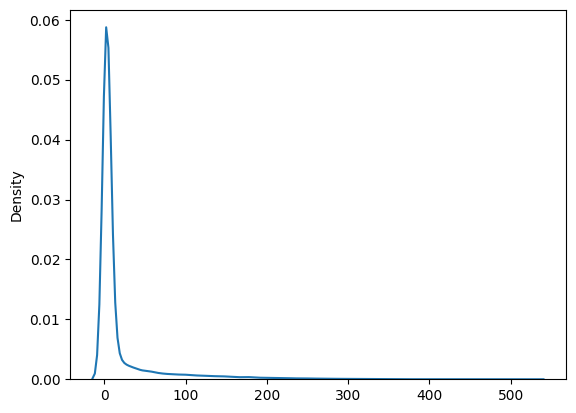

In [52]:
sns.kdeplot(d)

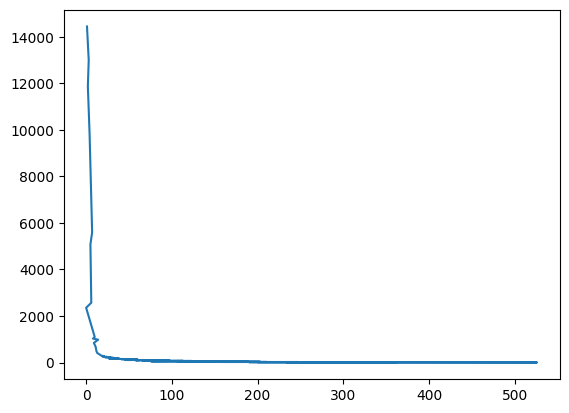

In [53]:
plt.plot(d.value_counts())

In [54]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [55]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

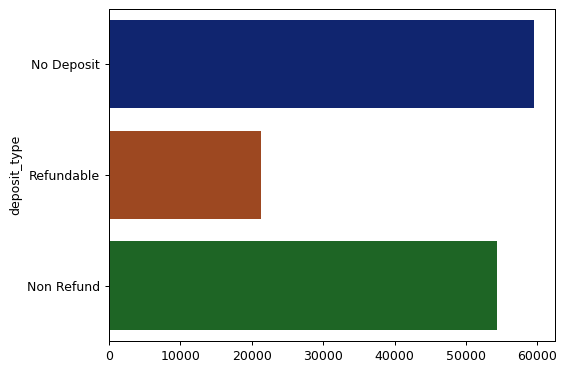

In [56]:
sns.barplot(df["deposit_type"],ci=False,palette="dark")
plt.gcf().set_dpi(90)

In [57]:
df.drop(["year","month","day"],axis=1,inplace=True)

In [58]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [59]:
df["adults"].value_counts()

adults
2     64497
1     16503
3      5935
0       219
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

<BarContainer object of 14 artists>

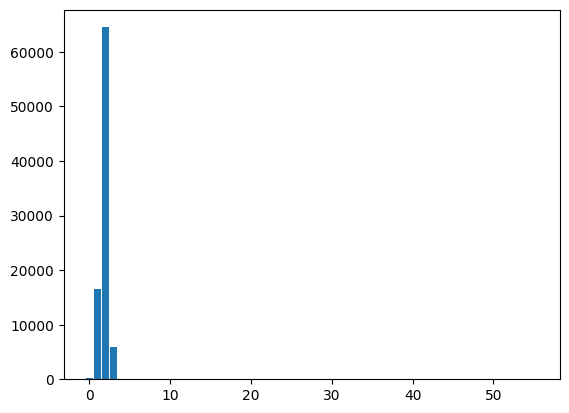

In [60]:
plt.bar(df["adults"].value_counts().index,df["adults"].value_counts())

In [61]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

<Axes: xlabel='hotel', ylabel='count'>

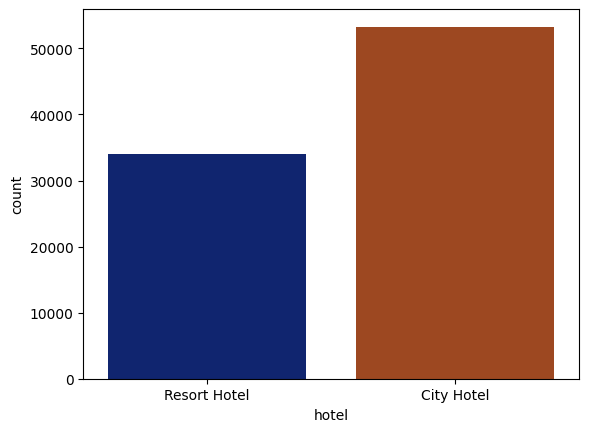

In [62]:
sns.countplot(x=df["hotel"],palette="dark")

In [63]:
#Check only couples
cop = df[(df["adults"]==2)&(df["children"]==0)&(df["babies"]==0)]

In [64]:
len(cop)/len(df)*100
#65% of the bookings are from only 2 adults

64.86185945202338

In [65]:
df["total_guest"] = df["adults"]+df["children"]+df["babies"] 

In [66]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date,total_guest
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0


In [67]:
df[["Date","total_guest"]]

,Date,total_guest
0,2015-07-01,2.0
1,2015-07-01,2.0
2,2015-07-01,1.0
3,2015-07-01,1.0
4,2015-07-01,2.0
...,...,...
119385,2017-08-30,2.0
119386,2017-08-31,3.0
119387,2017-08-31,2.0
119388,2017-08-31,2.0


In [68]:
tot_guests_by_date = df.groupby("Date").agg({"total_guest":"sum"})

In [69]:
tot_guests_by_date.sort_values(by="total_guest",ascending=False)

,total_guest
Date,
2017-04-29,509.0
2016-08-01,481.0
2016-08-08,479.0
2017-07-15,476.0
2017-05-25,473.0
...,...
2015-12-08,49.0
2015-11-15,46.0
2015-12-15,40.0


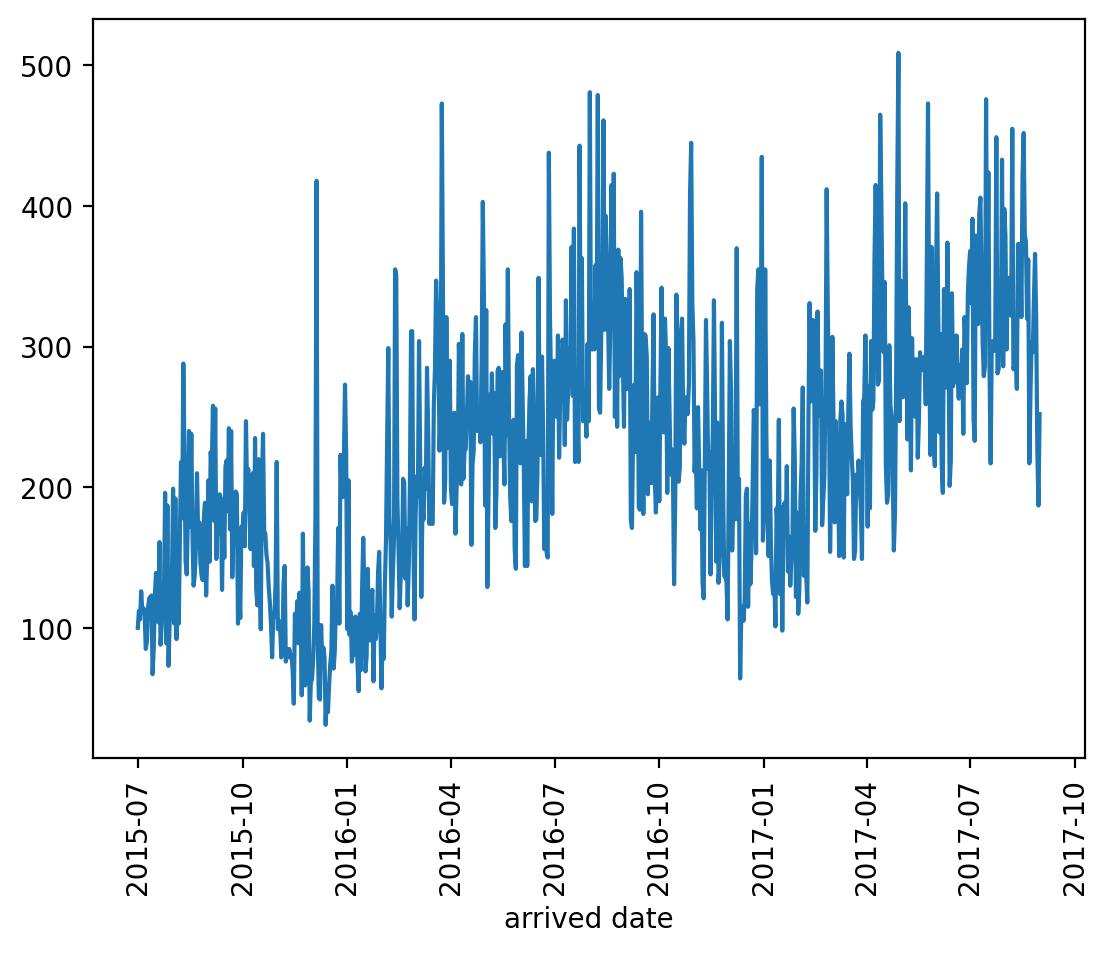

In [70]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
plt.xlabel("arrived date")
plt.plot(tot_guests_by_date)

In [71]:
type(tot_guests_by_date)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

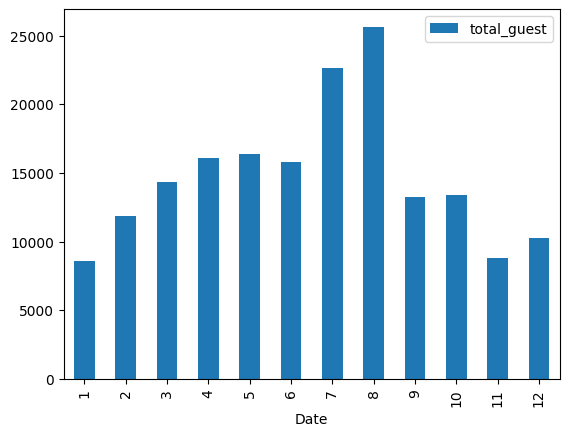

In [75]:
df.groupby(df["Date"].dt.month).agg({"total_guest":"sum"}).plot(kind='bar')

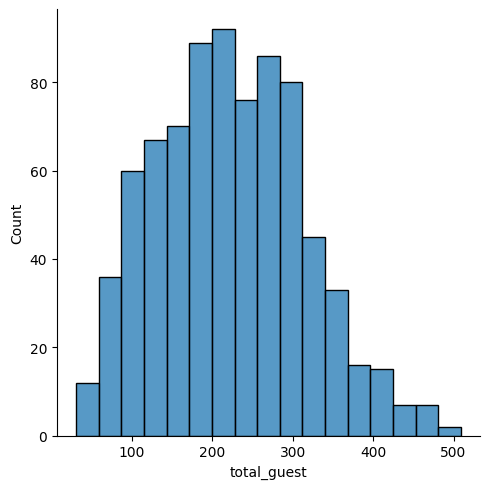

In [82]:
sns.displot(tot_guests_by_date["total_guest"])

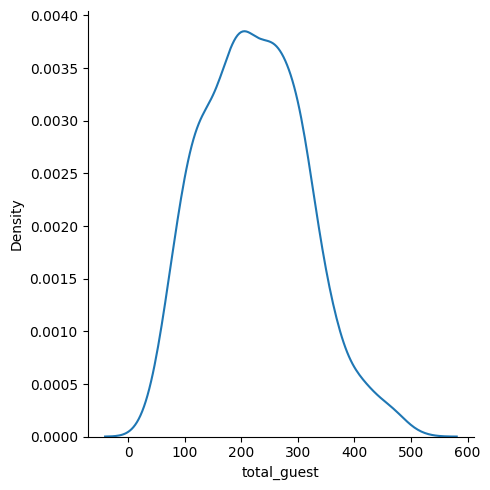

In [83]:
sns.displot(tot_guests_by_date["total_guest"],kind='kde')